In [63]:
import torch
import matplotlib.pyplot as plt
import numpy as np



[85, 126, 116, 107, 110, 87, 87, 99, 89, 94]

In [139]:

lime_mnist_image = torch.load("lime_MNIST_data")

all_mse = []

for epoch in range(10):

    lime_gen_image = torch.load(f"lime_{(epoch + 1) * 5}epoch_Generate_data")

    mse = [[] for i in range(10)]
    sum = 0
    cnt = 0

    for i in range(len(lime_gen_image['image'])):

        for j in range(len(lime_mnist_image['image'])):

            if i%10 == lime_mnist_image['label'][j]:
                tmp = np.square(np.subtract(lime_gen_image['masks'][i], lime_mnist_image['masks'][j])).mean()
                mse[i%10].append(tmp)
                sum += tmp
                cnt += 1


    print(f"{(epoch + 1) * 5} epoch result")
    print(f"avg_mse : {sum/cnt}")
    all_mse.append(sum/cnt)

    for i in range(10):
        sum = 0
        cnt = 0

        for j in mse[i]:
            sum += j
            cnt += 1

        print(f"{i} mse : {sum/cnt}")


for epoch in range(3):

    lime_gen_image = torch.load(f"lime_{(epoch + 2) * 50}epoch_Generate_data")

    mse = [[] for i in range(10)]
    sum = 0
    cnt = 0

    for i in range(len(lime_gen_image['image'])):

        for j in range(len(lime_mnist_image['image'])):

            if i%10 == lime_mnist_image['label'][j]:
                tmp = np.square(np.subtract(lime_gen_image['masks'][i], lime_mnist_image['masks'][j])).mean()
                mse[i%10].append(tmp)
                sum += tmp
                cnt += 1


    print(f"{(epoch + 2) * 50} epoch result")
    print(f"avg_mse : {sum/cnt}")
    all_mse.append(sum/cnt)

    for i in range(10):
        sum = 0
        cnt = 0

        for j in mse[i]:
            sum += j
            cnt += 1

        print(f"{i} mse : {sum/cnt}")



5 epoch result
avg_mse : 0.5187184948979585
0 mse : 0.5523649459783918
1 mse : 0.5112163913184323
2 mse : 0.46767461294862694
3 mse : 0.44796752813274887
4 mse : 0.5769526901669766
5 mse : 0.5161564625850331
6 mse : 0.5797032606145917
7 mse : 0.571033034425891
8 mse : 0.5638486012382483
9 mse : 0.4218302214502825
10 epoch result
avg_mse : 0.5315839285714259
0 mse : 0.5713595438175273
1 mse : 0.5378522837706509
2 mse : 0.5149872448979584
3 mse : 0.4686689395384323
4 mse : 0.5909624304267165
5 mse : 0.4184039995308467
6 mse : 0.6136039760731881
7 mse : 0.5749652133580709
8 mse : 0.4965317587709236
9 mse : 0.5261642422926619
15 epoch result
avg_mse : 0.524289285714285
0 mse : 0.5481227490996397
1 mse : 0.5329952218982831
2 mse : 0.5138326882477128
3 mse : 0.4630948407400344
4 mse : 0.5547425788497219
5 mse : 0.4786960473844713
6 mse : 0.5617874736101341
7 mse : 0.5869872191300762
8 mse : 0.49571629213483137
9 mse : 0.5065051020408173
20 epoch result
avg_mse : 0.5343019132653102
0 mse : 0.

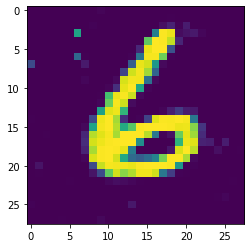

In [124]:
from skimage.color import gray2rgb, rgb2gray, label2rgb # since the code wants color images


tmp = torch.load("save_50epoch_Generate_image")

plt.imshow(tmp[6].detach().cpu().numpy().reshape(28,28))

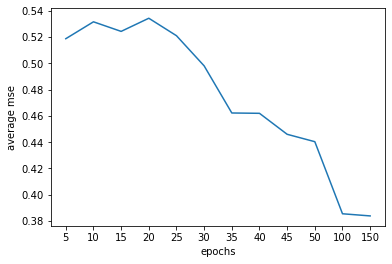

In [142]:

x_value = ['5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '100', '150']

plt.plot(x_value, all_mse[:len(all_mse)-1])
plt.xlabel('epochs')
plt.ylabel('average mse')
plt.title("MSE change by epoch")

plt.savefig('savefig_default.png')


In [145]:
from torchvision.utils import save_image, make_grid


x_value = ['5', '25', '50', '100', '150']


for i in range(5):

    lime_gen_image = torch.load(f"lime_{x_value[i]}epoch_Generate_data")

    save_image(make_grid(lime_gen_image['image'][:30], nrow=10), f'CGAN_fake_samples{x_value[i]}.png',)
